In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr

In [14]:
end = dt.datetime(2020, 12, 31)
start = dt.datetime(2010, 1, 1)

In [15]:
end

datetime.datetime(2020, 12, 31, 0, 0)

In [16]:
start

datetime.datetime(2010, 1, 1, 0, 0)

In [30]:
stocklist = ['CBA', 'NAB', 'WBC', 'ANZ']
stocks = [i + '.AX' for i in stocklist]

In [31]:
stocks

['CBA.AX', 'NAB.AX', 'WBC.AX', 'ANZ.AX']

In [32]:
import yfinance as yfin
yfin.pdr_override()


In [33]:
df = pdr.get_data_yahoo(stocks, start, end)
df.index

[*********************100%%**********************]  4 of 4 completed


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=2780, freq=None)

In [34]:
Close = df.Close
Close.head()

ANZ.AX     CBA.AX     NAB.AX     WBC.AX
Date                                                  
2010-01-04  22.889999  54.574314  26.065140  25.128922
2010-01-05  23.000000  55.399841  26.398088  25.337502
2010-01-06  22.660000  55.678333  25.884398  25.218313
2010-01-07  22.120001  55.141243  25.675116  24.880611
2010-01-08  22.250000  55.857365  25.589499  24.979937

In [38]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles=[0.1, 0.5, 0.9])

ANZ.AX     CBA.AX     NAB.AX     WBC.AX
count  69.000000  69.000000  69.000000  69.000000
mean   20.710725  74.186376  20.850290  18.863333
std     2.189411   6.933913   2.215983   1.175376
min    16.850000  63.610001  17.120001  16.370001
10%    17.780000  65.889998  18.214000  17.338000
50%    20.190001  72.400002  21.200001  18.730000
90%    23.284000  83.164003  23.391999  20.270000
max    23.660000  84.720001  24.049999  20.889999

<Axes: xlabel='Date'>

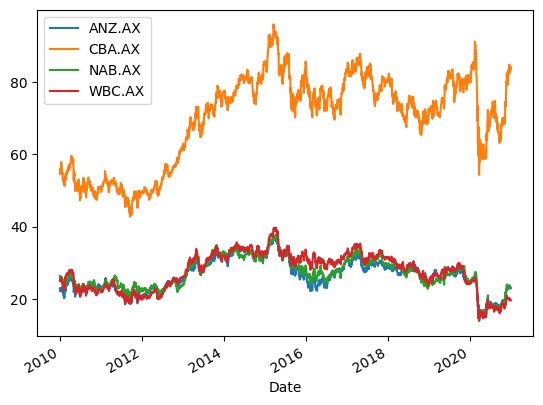

In [39]:
Close.plot()

In [40]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

/home/eschyle/.local/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



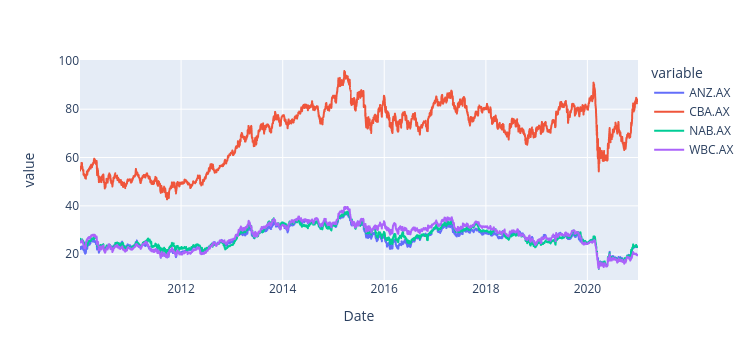

In [41]:
Close.plot()

In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

In [44]:
end = dt.datetime.now()
start = dt.datetime(2018, 1, 1)
df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()


[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  80.300003  80.330002  79.779999  80.220001  61.158569  1284609
2018-01-03  80.470001  80.644997  80.059998  80.139999  61.097569  1349269
2018-01-04  80.480003  80.480003  79.809998  79.970001  60.967968  1596303
2018-01-05  80.540001  81.250000  80.370003  81.160004  61.875214  2208531
2018-01-08  81.400002  81.750000  81.300003  81.620003  62.225906  1293549

In [53]:
df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean()
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()

In [54]:
df['MA50'].head(30)

Date
2018-01-02    80.220001
2018-01-03    80.180000
2018-01-04    80.110001
2018-01-05    80.372501
2018-01-08    80.622002
2018-01-09    80.883335
2018-01-10    80.987144
2018-01-11    81.026252
2018-01-12    81.010001
2018-01-15    81.026001
2018-01-16    80.985456
2018-01-17    80.912501
2018-01-18    80.834616
2018-01-19    80.762858
2018-01-22    80.635334
2018-01-23    80.548751
2018-01-24    80.437060
2018-01-25    80.337779
2018-01-29    80.277369
2018-01-30    80.218001
2018-01-31    80.153810
2018-02-01    80.147274
2018-02-02    80.175218
2018-02-05    80.159584
2018-02-06    80.049201
2018-02-07    79.923847
2018-02-08    79.797408
2018-02-09    79.670715
2018-02-12    79.540001
2018-02-13    79.432001
Name: MA50, dtype: float64

In [55]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, subplot_titles=('CBA', 'Volume'),
                    row_width=[0.2, 0.7])

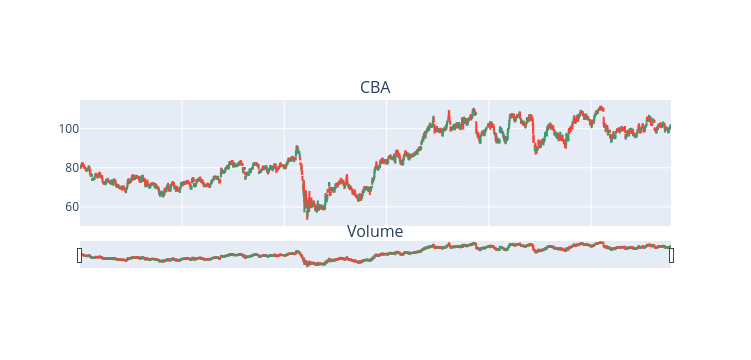

In [57]:
import plotly.graph_objects as go
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'],
                             low=df['Low'], close=df['Close'], name='OHLC'))


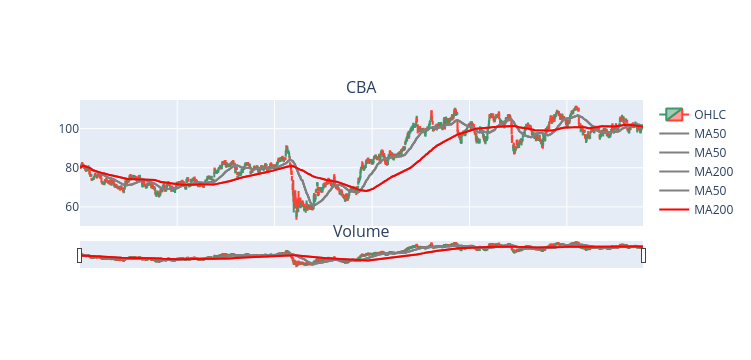

In [60]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='red', name='MA200'), row=1, col=1)

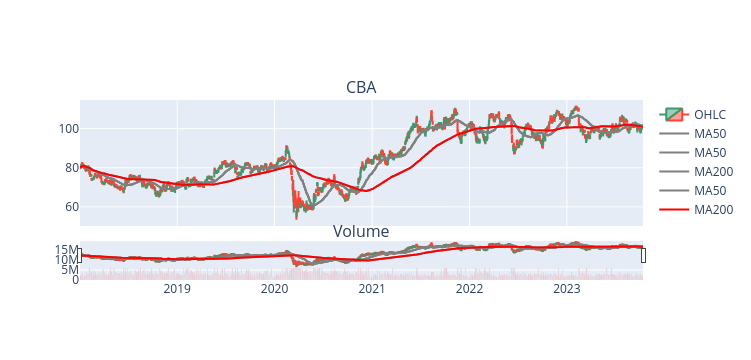

In [61]:
fig.add_trace(go.Bar(x = df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

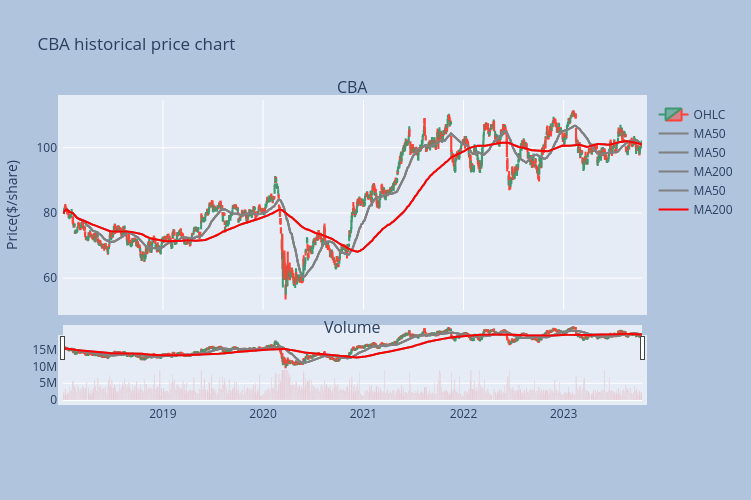

In [62]:
fig.update_layout(
    title='CBA historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price($/share)',
        title_font_size=14,
        tickfont_size=12
    ),
    autosize=False,
    width=800, 
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=5),
    paper_bgcolor = 'LightSteelBlue'
)

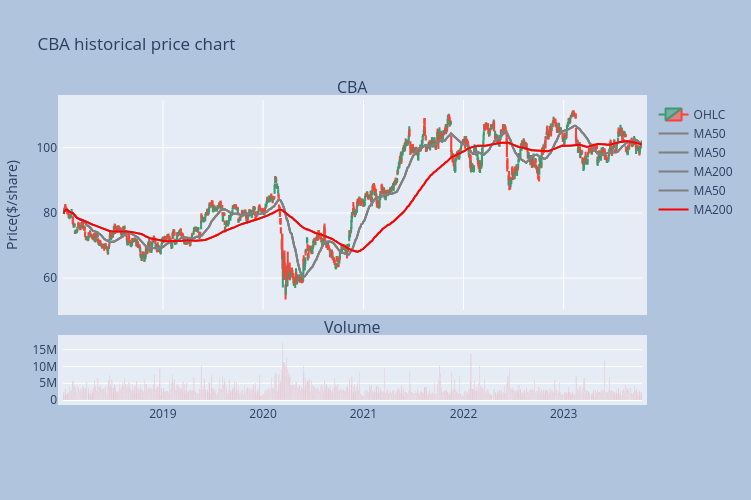

In [63]:
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [66]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-03   -0.000997
2018-01-04   -0.002121
2018-01-05    0.014881
2018-01-08    0.005668
2018-01-09    0.006984
                ...   
2023-10-09   -0.000100
2023-10-10    0.006698
2023-10-11   -0.000596
2023-10-12    0.009539
2023-10-13   -0.006201
Name: Close, Length: 1464, dtype: float64

/home/eschyle/.local/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



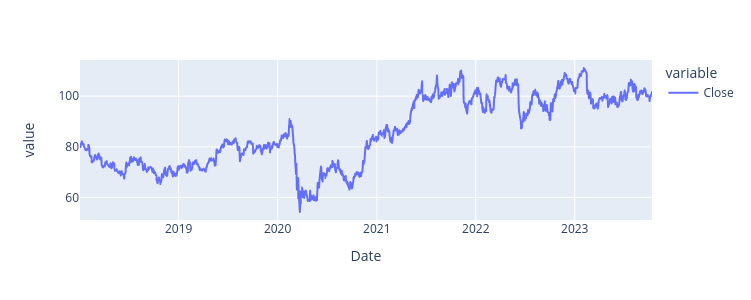

In [68]:
df.Close.plot().update_layout(autosize=False, width=500, height=300)

In [69]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 80.22000122070312 Last 100.97000122070312


/tmp/ipykernel_6206/223727047.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [70]:
simple_returns.mean()

0.0002682485935916049

In [71]:
df.Close[0] * (1 + simple_returns.mean())**len(simple_returns)

/tmp/ipykernel_6206/582429012.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



118.79937586406884

In [75]:
import numpy as np
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2018-01-03   -0.000998
2018-01-04   -0.002124
2018-01-05    0.014771
2018-01-08    0.005652
2018-01-09    0.006959
                ...   
2023-10-09   -0.000100
2023-10-10    0.006676
2023-10-11   -0.000596
2023-10-12    0.009494
2023-10-13   -0.006220
Name: Close, Length: 1464, dtype: float64

In [76]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

/tmp/ipykernel_6206/1893717394.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



100.97000122070288

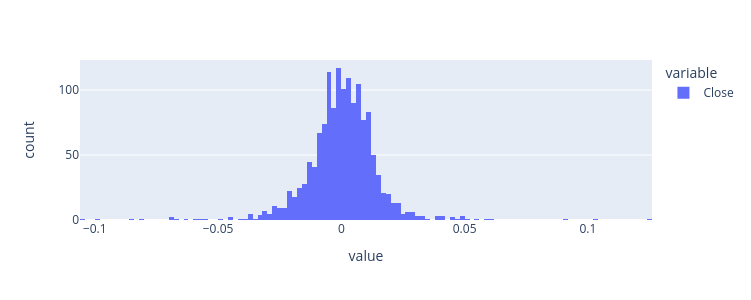

In [77]:
log_returns.plot(kind='hist').update_layout(autosize=False, width=500, height=300)

In [78]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()

In [79]:
log_returns_sorted

[-0.10542748140839582,
 -0.09905615725187446,
 -0.08414505537906626,
 -0.08195450000079775,
 -0.06933966255442896,
 -0.06868142489239658,
 -0.06684062351992648,
 -0.06338002505331027,
 -0.0589098457460638,
 -0.05609797505174852,
 -0.055826190789408175,
 -0.04804767151035624,
 -0.04513756795923686,
 -0.045035919655631015,
 -0.04158908557591781,
 -0.03891286707292099,
 -0.03743468277039608,
 -0.03660025996281141,
 -0.03626512972440105,
 -0.036178616425993036,
 -0.036126125353881114,
 -0.03513312514945437,
 -0.0338746081876527,
 -0.03386249826167536,
 -0.033056596109175426,
 -0.03257067779366116,
 -0.031890092286125084,
 -0.031798670286381524,
 -0.030878146506698168,
 -0.030586309308507323,
 -0.030536742388462487,
 -0.030339493532709857,
 -0.03029669275028167,
 -0.029336581938461417,
 -0.02897902575127855,
 -0.028847439374908843,
 -0.028802834852634934,
 -0.0285765195593906,
 -0.027975848807644962,
 -0.02790003805184871,
 -0.02789673702674373,
 -0.027888722221990313,
 -0.02729126928963663

In [84]:
import scipy.stats as stats

worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean()) / log_returns.std()
std_best = (best - log_returns.mean()) / log_returns.std()

print('Std dev. worst %.2f best %.2f' % (std_worst, std_best))
print('Probability worst %.10f best %.13f' % (stats.norm(0, 1).pdf(std_worst), 
                                        (stats.norm(0, 1).pdf(std_best))))


Std dev. worst -7.08 best 8.34
Probability worst 0.0000000000 best 0.0000000000000


In [85]:
stats.probplot(log_returns, dist='norm', plot=pylab)

NameError: name 'pylab' is not defined

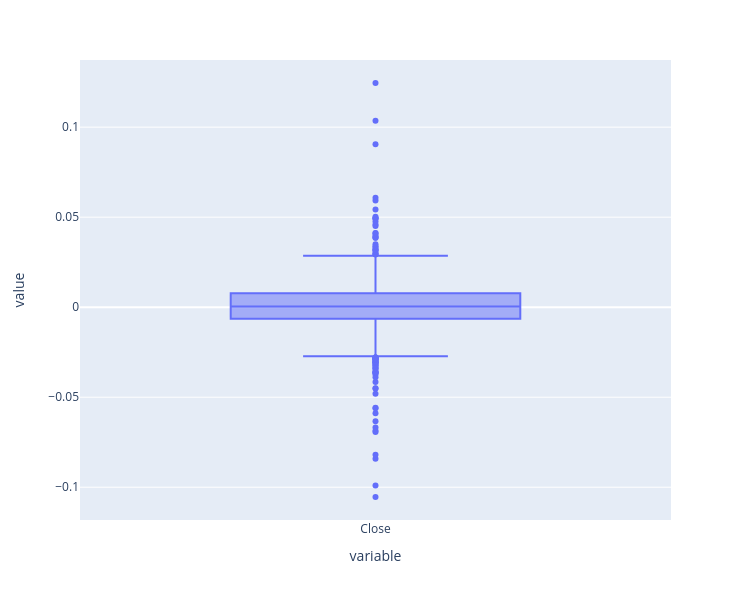

In [87]:
log_returns.plot(kind='box').update_layout(autosize=False, width=500, height=600)

In [89]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print('Proba is gaussian')
else:
    print('Proba is not gaussian')
    

0.47587707718221295 4.487595724529177e-305
Proba is not gaussian
